# NYC Airbnb Hosts Analysis

## 1 Introduction

This is an exploratory data analysis for Airbnb hosts information from 2016 to 2018. The results shown in this notebook will be used for building TripElf, an interactive map application.

### 1.1 Load Libraries

In [1]:
# settings
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (20.0, 10.0)

import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")
from shapely.geometry import Point, Polygon
import seaborn as sns

### 1.2 Load Dataset

In [52]:
# import listings
listings = pd.read_csv("listings.csv")
host = listings[["neighbourhood_group_cleansed","neighbourhood_cleansed","host_response_time","host_response_rate","host_acceptance_rate","host_is_superhost"]]
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2515,https://www.airbnb.com/rooms/2515,20181206022948,2018-12-06,Stay at Chez Chic budget room #1,Step into our artistic spacious apartment and enjoy your artistic Guest room with original artwork from NY artists. Shared with my little family however we often out and you won't see us much. across the street from Central Park - the busy city minutes away but sleeping in quiet at night!,"-PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUEST FOR DATES> CALENDAR IS UP TO DATE> ALL AIRBNB RESERVATIONS WILL BE HONORED> Nice, comfortable, and clean private guest room with shared bathroom (2 people max) - full size bed. In very nice apartment on central Park North 4th floor walk-up. same place as Chez chic #2, max capacity of the rooms 2 people). You will share the apt with me and my little family. Daily cleaning in common areas. Located one block from Subway 2/3,B/C on 110th street, Bus M1,2,3,4 at the corner, central park across the street. Your room: full size bed (sleeps two), desk, Digital Tv/DVD, wifi internet, A/C, closet and desk. Sheets/Towels provided. Iron/air dryer provided. Separate Full bathroom shared with guestroom room #2. Access to the Kitchen from 8AM weekdays or anytime during the weekend and light cooking, access to kitchen at all times but no cooking in the evening. The apartment: spacious newly renovated, hardwood floors,3BD, 2Bath apartment with Living r","Step into our artistic spacious apartment and enjoy your artistic Guest room with original artwork from NY artists. Shared with my little family however we often out and you won't see us much. across the street from Central Park - the busy city minutes away but sleeping in quiet at night! -PLEASE BOOK DIRECTLY. NO NEED TO SEND A REQUEST FOR DATES> CALENDAR IS UP TO DATE> ALL AIRBNB RESERVATIONS WILL BE HONORED> Nice, comfortable, and clean private guest room with shared bathroom (2 people max) - full size bed. In very nice apartment on central Park North 4th floor walk-up. same place as Chez chic #2, max capacity of the rooms 2 people). You will share the apt with me and my little family. Daily cleaning in common areas. Located one block from Subway 2/3,B/C on 110th street, Bus M1,2,3,4 at the corner, central park across the street. Your room: full size bed (sleeps two), desk, Digital Tv/DVD, wifi internet, A/C, closet and desk. Sheets/Towels provided. Iron/air dryer provided. Separat",none,NaN,Please no cooking at night but you can warm up food in the microwave and use the kitchen,Subway 2.3.B.C. at 110th street around the corner and bus M.2.3.4

In [50]:
host.head()

,neighbourhood_group_cleansed,neighbourhood_cleansed,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost
0,Manhattan,Harlem,within a few hours,70%,NaN,t
1,Manhattan,Upper West Side,within a day,80%,NaN,f
2,Brooklyn,Kensington,within an hour,100%,NaN,t
3,Manhattan,Midtown,within a few hours,82%,NaN,f
4,Manhattan,Harlem,NaN,NaN,NaN,f


### 1.3 Dataset structure and content

In [12]:
print("Shape of the dataset: ", host.shape)

Shape of the dataset:  (49056, 6)


In [13]:
host.columns

Index(['neighbourhood_group_cleansed', 'neighbourhood_cleansed', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost'], dtype='object')

In [14]:
host.dtypes

neighbourhood_group_cleansed     object
neighbourhood_cleansed           object
host_response_time               object
host_response_rate               object
host_acceptance_rate            float64
host_is_superhost                object
dtype: object

### 1.4 Missing Values

In [19]:
print("Number of rows of the dataset: ", len(host))
host.isnull().sum()

Number of rows of the dataset:  49056


neighbourhood_group_cleansed    0    
neighbourhood_cleansed          0    
host_response_time              21858
host_response_rate              21858
host_acceptance_rate            49056
host_is_superhost               7    
dtype: int64

As we can see that "host_acceptance_rate" column is completely missing, so we will drop this column.

In [23]:
host = host.drop(["host_acceptance_rate"],axis=1)
host.head()

,neighbourhood_group_cleansed,neighbourhood_cleansed,host_response_time,host_response_rate,host_is_superhost
0,Manhattan,Harlem,within a few hours,70%,t
1,Manhattan,Upper West Side,within a day,80%,f
2,Brooklyn,Kensington,within an hour,100%,t
3,Manhattan,Midtown,within a few hours,82%,f
4,Manhattan,Harlem,NaN,NaN,f


## 2 Individual feature visualizations

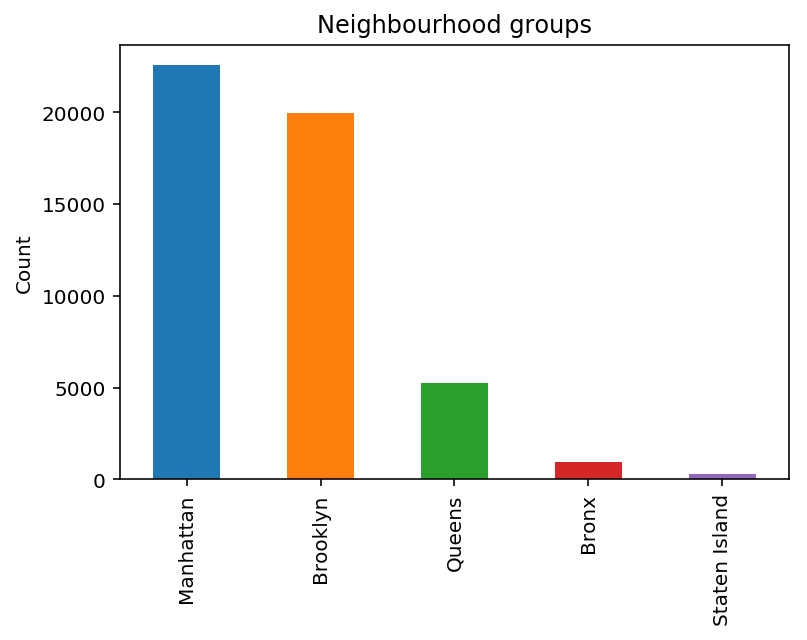

In [40]:
host['neighbourhood_group_cleansed'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Neighbourhood groups')
plt.show()

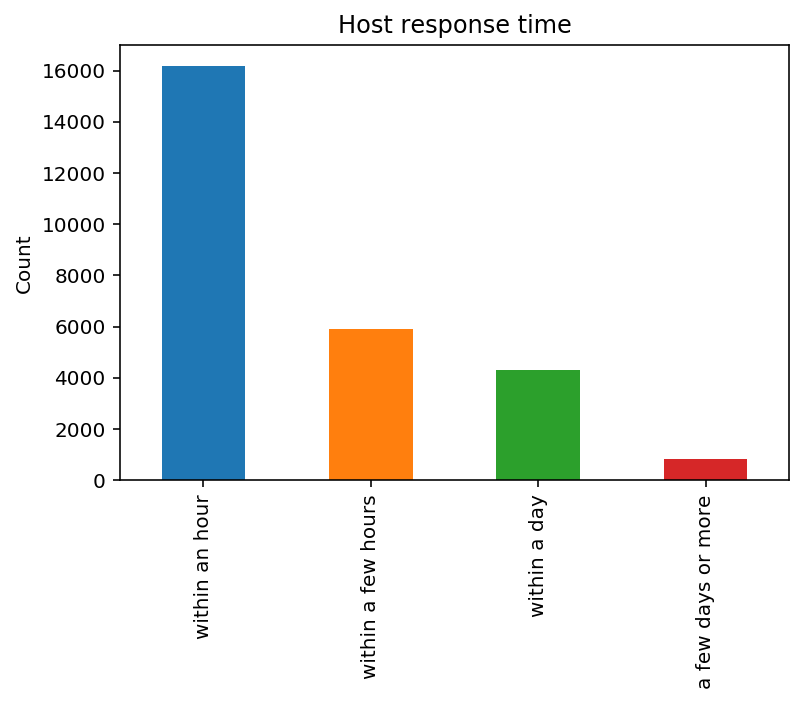

In [41]:
host['host_response_time'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Host response time')
plt.show()

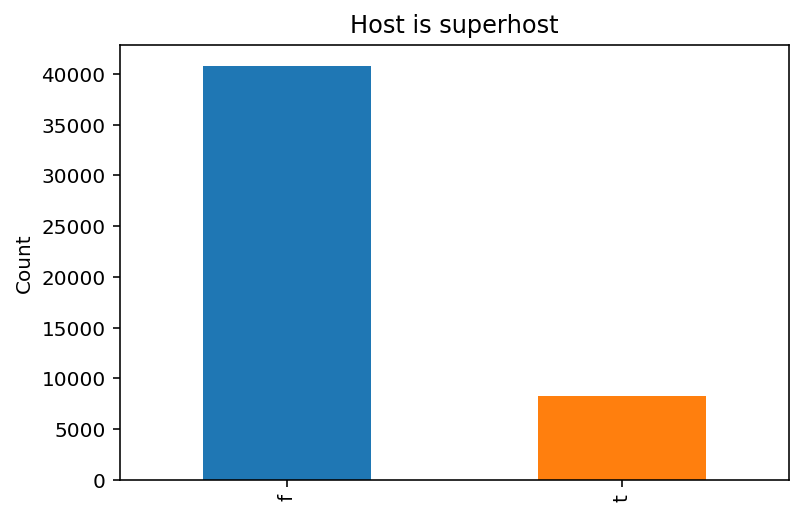

In [45]:
host['host_is_superhost'].value_counts().plot.bar()
plt.ylabel('Count')
plt.title('Host is superhost')
plt.show()

## 3 Feature Aggregration

### 3.1 host_response_rate
Calculate the median of host_response_time and group_by neighbourhood_cleansed.

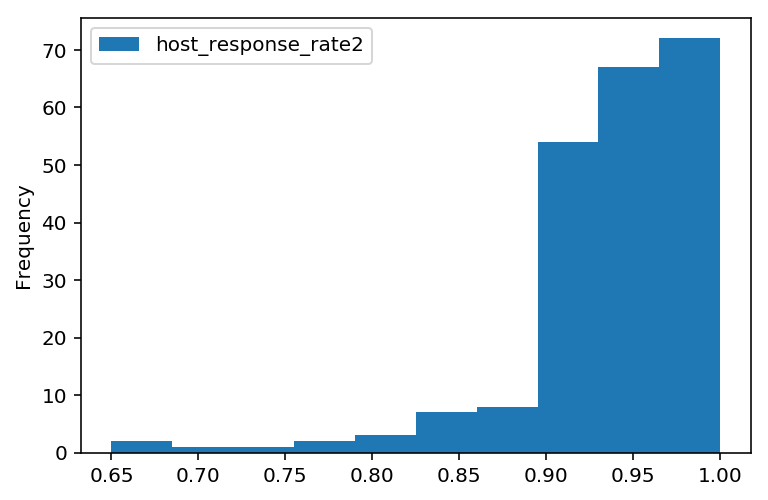

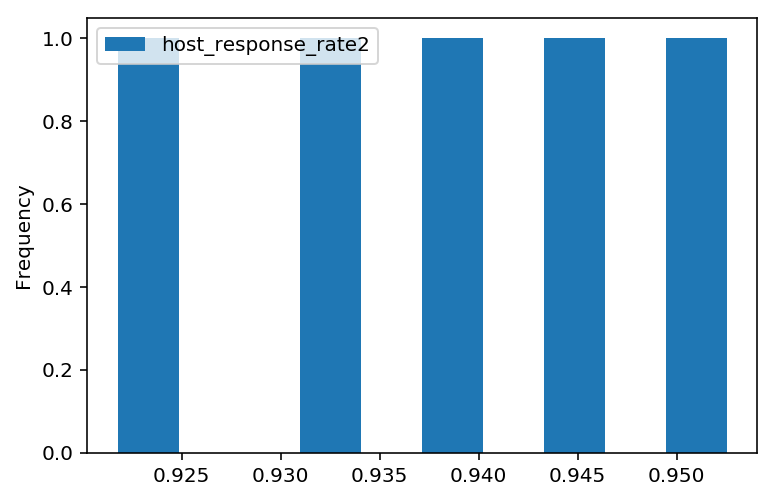

In [33]:
# aggregate host_response_rate

host["host_response_rate2"] = host['host_response_rate'].str.strip("%").astype(float)/100

a = host.groupby(["neighbourhood_cleansed"])[["host_response_rate2"]]
a.aggregate(np.mean).plot.hist()
b = host.groupby(["neighbourhood_group_cleansed"])[["host_response_rate2"]]
b.aggregate(np.mean).plot.hist()

### 3.2 host_is_superhost

Calculate the medain of host_response_rate and group_by neighbourhood_cleansed.

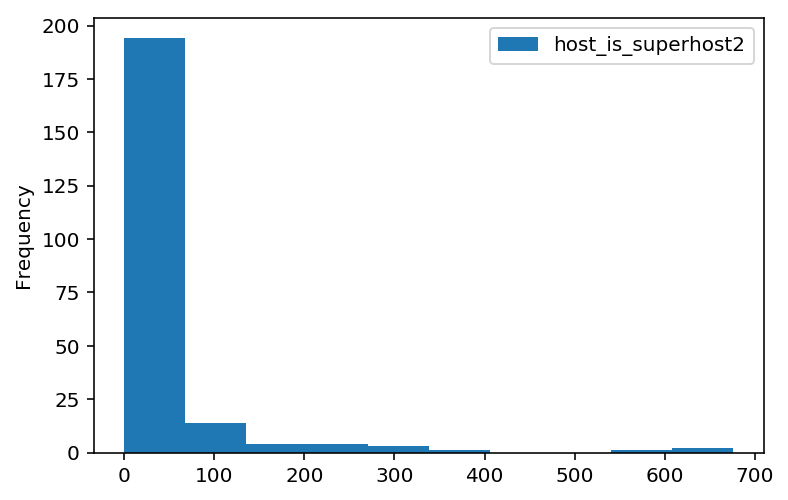

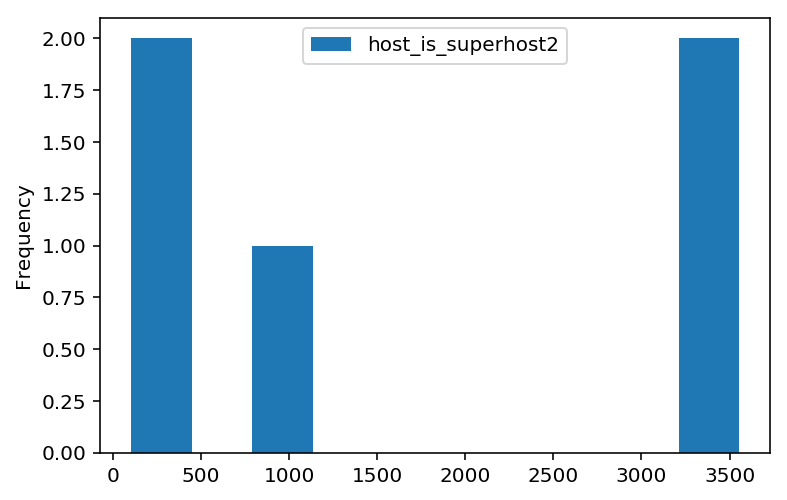

In [46]:
# aggregate host_is_superhost

host["host_is_superhost2"] = host["host_is_superhost"]
host["host_is_superhost2"] = host["host_is_superhost2"] .map({"f": 0, "t": 1})
host.groupby(["neighbourhood_cleansed"])[["host_is_superhost2"]].sum().plot.hist()
host.groupby(["neighbourhood_group_cleansed"])[["host_is_superhost2"]].sum().plot.hist()

### 3.3 host_response_time

Calculate host_is_superhost count and group_by neighbourhood_cleansed.  
Designed the formula below for turing categroy data into numeric:  

within an hour = 1h  
within a few hours = 12h  
within a day = 24h  
within a few days or more = 72h  

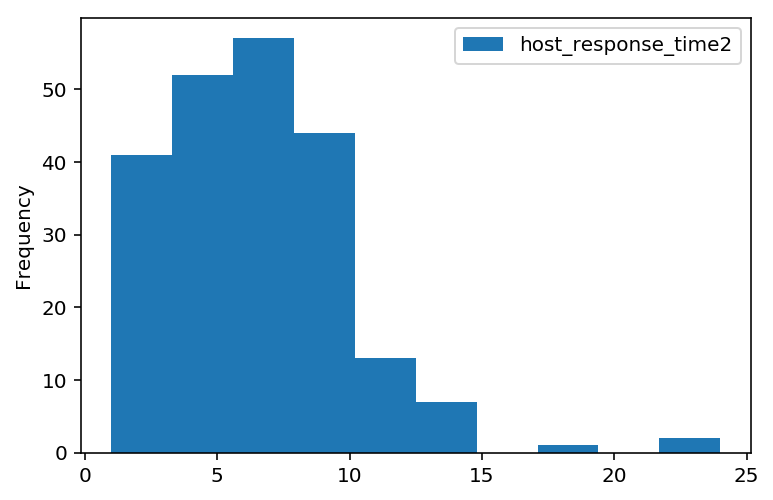

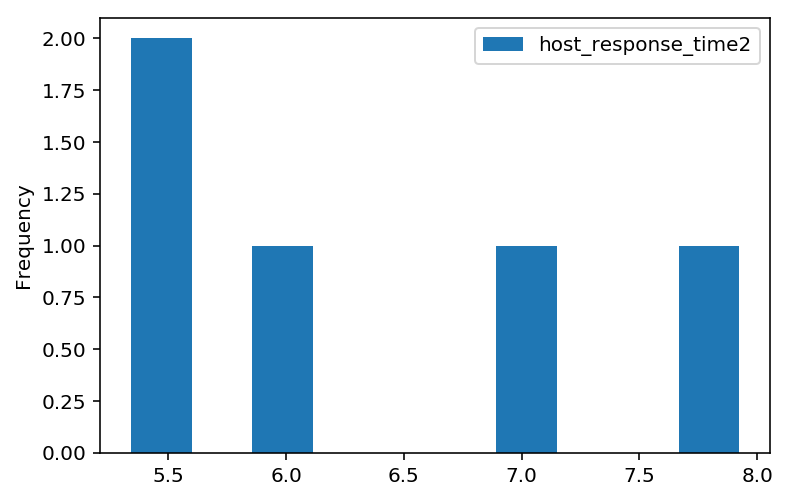

In [47]:
# aggregate host_response_time

# within an hour = 1h
# within a few hours = 12h
# within a day = 24h
# within a few days or more = 72h

host["host_response_time2"] = host["host_response_time"]
host["host_response_time2"] = host["host_response_time2"] .map({"within an hour": 1, "within a few hours": 12, "within a day": 24, "within a few days or more" : 72})
host.groupby(["neighbourhood_cleansed"])[["host_response_time2"]].aggregate(np.mean).plot.hist()
host.groupby(["neighbourhood_group_cleansed"])[["host_response_time2"]].aggregate(np.mean).plot.hist()